# **Basic introduction to Logistic Regression in TensorFlow 2.0**

## **Learning Objectives**

1. Build a logistic regression model
2. Train the model on example data
3. Use the model to make predictions about unknown data

## **Introduction**

This notebook walks through a classification problem. The goal is to *categorise* Iris flowers by species. TensorFlow is used for:
- getting familiar with default eager execution environment
- importing data with the Datasets API
- building models and layers with the Keras API

### **Configure imports**

Import TensorFlow and the other required Python modules. By default, TensorFlow uses eager execution to evaluate operations immediately, returning concrete values instead of creating a computational graph to be executed (which would be lazy evaluation).

In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution mode: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.4.1
Eager execution mode: True


## **The Iris classification problem**

Imagine you are a botanist seeking an automated way to categorise each Iris flower you find. ML provides many algorithms to classify flowers statistically. For instance, a sophisticated ML program could classify flowers based on photographs. Our ambitions are more modest here -- we are going to classify Iris flowers based on the length and width measurements of their sepals and petals.

The Iris genus entails about 300 species, but our program will only classify the following three:
- Iris setosa
- Iris virginica
- Iris versicolor
Fortunately, someone has already created a data set of 120 Iris flowers with the sepal and petal measurements. This is a classic data set that is popular for basic ML classification problems.

### **Import and parse the training data set**
Download the data set file and convert it into a structure to be fed into TensorFlow.

#### **Download the dataset**

In [2]:
train_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

# tf.keras.utils.get_file returns an object file path named fname of the downloaded file from origin
train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_url),
                                           origin=train_url)
print("Local copy of the data set file: {}".format(train_dataset_fp))

Local copy of the data set file: /home/antounes/.keras/datasets/iris_training.csv


#### **Inspect the data**
This data set, `iris_training.csv` is a plain text file that stores tabular data formatted as comma-separated values (CSV). Let's take a peek at the first five entries

In [3]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


Note the following:
1. The first line is a header containing information about the data set:
- there are 120 total examples. Each example has four *features* and one of three possible *label names*
2. Subsequent rows are data records, one example per line:
- the first 4 fields are the *features*: here float numbers representing flower measurements
- the last columnis the *label*: here an integer value corresponding to a flower name
    

In [4]:
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


Each label is associated with a string name (e.g. `setosa`), but ML typically relies on *numeric values*. The label numbers are mapped to a named representation, such as:

-`0`: Iris setosa
-`1`: Iris versicolor
-`2`: Iris virginica

In [5]:
class_names = ["Iris setosa", "Iris versicolor", "Iris virginica"]

#### **Create a tf.data.Dataset**

TensorFlow Dataset API handles many common cases for loading data into a model. This is a high-level API for reading data and transforming it into a form used for training.

Since the dataset is a CSV-formatted text file, we'll use `tf.data.experimental.make_csv_dataset` to parse the data into a suitable format. This function generates new data for training models, the default behaviour is to shuffle the data `(shuffle=True, shuffle_buffer_size=10000)` and repeat the dataset forever `(num_epochs=None)`; the `batch_size` parameter is also set.

In [6]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1
)

The `make_csv_dataset` function returs a `tf.data.Dataset` of `(features, label)` pairs, where `features` is a `dict`: `{"feature_name": value}`.
The `tf.data.Dataset` objects are iterable.

In [14]:
features, labels = next(iter(train_dataset))
print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([5.4, 4.8, 6.3, 4.9, 5.1, 6.5, 7.2, 6.3, 6.9, 6.1, 6. , 4.9, 5.4,
       5.6, 5.1, 4.6, 4.4, 4.9, 6.4, 5.4, 6.3, 6.7, 5.8, 6.9, 4.9, 4.8,
       5.3, 4.8, 6.9, 4.4, 5.2, 6.1], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3. , 3. , 2.5, 3.1, 3.8, 3.2, 3.6, 3.3, 3.2, 3. , 2.9, 3.1, 3.9,
       2.7, 3.7, 3.6, 3. , 3. , 2.8, 3.4, 2.3, 3.3, 4. , 3.1, 3.1, 3.4,
       3.7, 3. , 3.1, 2.9, 2.7, 2.9], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([4.5, 1.4, 5. , 1.5, 1.9, 5.1, 6.1, 6. , 5.7, 4.9, 4.5, 1.5, 1.3,
       4.2, 1.5, 1. , 1.3, 1.4, 5.6, 1.5, 4.4, 5.7, 1.2, 4.9, 1.5, 1.6,
       1.5, 1.4, 5.1, 1.4, 3.9, 4.7], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.5, 0.3, 1.9, 0.1, 0.4, 2. , 2.5, 2.5, 2.3, 1.8, 1.5, 0.1, 0.4,
       1.3, 0.4, 0.2, 0.2, 0.2, 2.1, 0.4, 1.3, 2.1, 0.2, 1.5,

Like-features are grouped together, or *batched*. Each example row's fields are appended to the corresponding feature array. The `batch_size` parameter controls the number of examples stored in the feature arrays. Let's have a look at some plots.

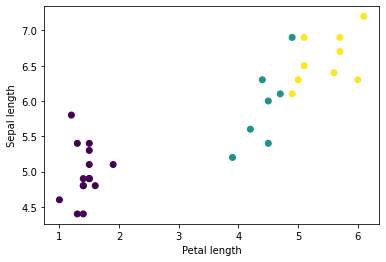

In [15]:
plt.scatter(
    features["petal_length"],
    features["sepal_length"],
    c=labels,
    cmap="viridis"
)

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

To simplify the model building step, create a function to repackage the features `dict` into a single array with shape: `(batch_size, num_features)`. This function uses the `tf.stack` method which takes values from a list of tensors and creates a combined tensor at the specified dimension.

In [16]:
def pack_features_vector(features, labels):
    """Pack the features into a single array"""
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

Then use the `tf.data.Dataset` `map` method to pack the `features` of each `(features, label)` pair into the training dataset.

In [17]:
train_dataset = train_dataset.map(pack_features_vector)

The features element of the `tf.data.Dataset` are now arrays with shape `(batch_size, num_features)`. Let's have a look at a few examples.

In [21]:
features, labels = next(iter(train_dataset))
print(features[:5], labels[:5])

tf.Tensor(
[[6.4 3.2 4.5 1.5]
 [6.3 2.7 4.9 1.8]
 [5.8 2.7 5.1 1.9]
 [6.  3.  4.8 1.8]
 [7.2 3.  5.8 1.6]], shape=(5, 4), dtype=float32) tf.Tensor([1 2 2 2 2], shape=(5,), dtype=int32)


### **Select the type of model**

#### **Why model ?**

A *model* is a relationship between the `features` and the `label`. For the Iris classification problem, the model defines the relationship between the sepal and petal measurements and the predicted Iris species. Some simple models can be described with a few lines of algebra, but complex machine learning models have a large number of parameters that are difficult to summarize.

Could you determine the relationship between the four features and the Iris species *without* using machine learning ? That is, could you use traditional programming techniques (e.g. a lot of conditional statements) to create a model ? Perhaps - if you analysed the dataset long enough to determine the relationships between petal and sepal measurement to a particular species. And this becomes difficult - maybe impossible - on more complicated datasets. A good machine learning approach *determines the model for you*. If you feed enough representative examples into the right ML model type, it will figure out the relationships for you.

#### **Select the model**

We need to select the kind of model to train. There are many types of models and picking a good one takes experience. This tutorial uses a neural network to solve the Iris classification problem. *Neural networks* can find complex relationships between the features and the label. 

It's a highly-structured graph, organised into one or more *hidden layers*. Each hidden layer consists of one or more *neurons*. There are several categories of neural networks and this program uses a *dense*, or *fully-connected* neural network: neurons in one layer receive input connections from *every* neuron in the previous layer. Below example of a dense neural network consisting of an input layer, two hidden layers and an output layer.

<img src="fully-connected-net.png"> 

When this model is trained and fed an unlabeled example, it yields three predictions: the likelihood that this flower is the given Iris species. This prediction is called *inference*. For this example, the sum of the output prediction is `1.0`. Here, the model predicts that the fed unlabeled example flower is an *Iris versicolor* with $95~\%$ probability.

#### **Create a model using `tf.keras.Sequential`**

The TensorFlow `tf.keras` API is the preferred way to created models and layers. This makes it easy to build models and experiment while `Keras` handles the complexity of connecting everything together.

The `tf.keras.Sequential` model is a linear stack of layers. Its constructor takes a list of layers instances and an output layer. Here we'll use 2 `tf.keras.layers.Dense` layers with 10 nodes each and an output layer with 3 nodes representing our label predictions. 

The first layer's `input_shape` parameter corresponds to the number of features from the dataset, and is required. The `activation` parameter decides which *activation function* to use and determines the output shape of each node in the layer. These non-linearities are important - without them the model would be equivalent to a single layer. There are many `tf.keras.activations`, but `ReLU` is common for hidden layers.

The ideal number of hidden layers and neurons depends on the problem and the dataset. Like many aspects of ML, picking the best shape of a neural network requires a mixture of knowledge and experimentation. As a rule of thumb, **increasing the number of hidden layers and neurons typically creates a more powerful model, thus requiring mode data to train efficiently** 

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(3)
])

#### **Using the model**

Let's have a quick look at what this model does with a batch of `features`

In [28]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-1.2545208 ,  1.8786243 ,  0.25325692],
       [-1.2109331 ,  1.8507948 ,  0.08853996],
       [-1.1591718 ,  1.7769098 ,  0.02409589],
       [-1.225023  ,  1.7955794 ,  0.10662377],
       [-1.2517062 ,  2.2210875 ,  0.234689  ]], dtype=float32)>

Here each example returns a `logit` for each class. A **logit** is a vector of raw predictions generated by a classification model, and is generally passed on to a normalised function. If the model is solving a multi-class classification problem, logits are generally fed into the `softmax` function. **softmax** generates a vector of normalised probabilities with one value for each possible class.

In addition, logit sometimes refers to the element-wise inverse of the *sigmoid function*.

Logits must then be converted into probabilities for each class by using the `softmax` output function

In [29]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.03513368, 0.8061786 , 0.15868768],
       [0.03841455, 0.8207054 , 0.14088014],
       [0.04327712, 0.815422  , 0.14130093],
       [0.03953989, 0.8107117 , 0.14974843],
       [0.026562  , 0.856004  , 0.11743402]], dtype=float32)>

And taking the `tf.argmax` across classes gives us the predicted class index. 

In [30]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
    Labels: [1 2 2 2 2 0 2 1 0 1 2 0 1 1 0 2 2 2 2 1 1 2 1 2 1 0 0 1 2 0 2 0]


But the model hasn't been trained yet, so these aren't good predictions. Indeed, the model here predicts that all species are *Iris versicolor*...

### **Train the model**

*Training* is the stage of ML when the model is gradually optimised, or the model *learns* the dataset. The goal is to learn enough about the structure of training dataset to make predictions about unseen data (i.e. to **generalise**). If the model learns *too much* about the training data set, then the predictions only work for the data it has seen and will not be generalisable. This problem is called **overfitting** - it's like memorising answers instead of learning how to solve a problem.

The Iris classification problem is an example of *supervised machine learning*: the model is trained from examples that contain labels. In *unsupervised machine learning*, examples don't contain labels. Instead, the model typically finds patterns among the features.

#### **Define the loss and gradient functions**

Both training and evaluation stages need to calculate the model **loss**. This measures how off predictions of a model are from the true label. In other words, it accounts for how bad a model performs. The goal is to minimise this value, this being an optimisation problem.

Loss is calculated using the `tf.keras.losses.SparseCategoricalCrossentropy` function which takes the model class probability predictions and the true label as inputs, and returns the average loss across the examples.

In [32]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

def loss(model, x, y, training):
    #training is required only if layers behave differently between training and inference (e.g. Dropout)
    y_hat = model(x, training=training)
    
    return loss_object(y_true=y, y_pred=y_hat)

l = loss(model,features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 1.8248038291931152


Gradients are calculated as vectors of partial derivatives of the model function. The gradient points in the direction of steepest ascent. They're stored within a *context*, using `tf.GradientTape`.

In [33]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets, training=True)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

#### **Create an optimiser**

An **optimiser** applies the computed gradients to the model variables to minimise the `loss` function. You can think of the loss function as a curved surface and the goal is to find its lowest point by walking around. The gradient points in the direction of the steepest ascent - so we'll travel to the opposite way and move down the hill. **By iteratively calculating the loss and gradient for each batch, we'll adjust the model during training**. Gradually, the best combination of weights and bias will be found to minimise loss. And the lower the loss, the better the model predictions. 

**Gradient descent** is an algorithm used for finding the optimal model configuration (i.e. parameters values) by minimising the model loss thanks to the computation of the gradients of loss with respect to the model parameters, conditioned on training data. Informally, gradient descent iteratively adjusts parameters gradually finding the best combination of weights and bias to minimise loss.

<img src="gradients.gif" width=500 height=500> 

TensorFlow has many optimisation algorithms available for training. Here we'll use `tf.keras.optimizers.SGD` that implements the *stochastic gradient descent* (SGD) algorithm. **Stochastic gradient descent** is a gradient descent algorithm in which the batch size is equal to $1$, relying on a single example chosen uniformly at random from a data set. The `learning_rate` sets the step size to take for each iteration down the hill. This is a *hyperparameter* that controls the training process itslef and is commonly adjusted to achieve better results.

Let's build the optimiser.

In [43]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

Now let's use the optimiser to compute a single optimisation step and see what happens

In [44]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(
    optimizer.iterations.numpy(),
    loss_value.numpy()))

optimiser.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(
    optimizer.iterations.numpy(),
    loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 1.8248038291931152
Step: 0,         Loss: 1.5501675605773926


#### **Training loop**